<a href="https://colab.research.google.com/github/IjeomaOdoko/Logistic-Regression-Bank-ML-dataset-/blob/master/Bank_ML_Logistic_regression_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking Machine Dataset


This dataset is as a result of bank's telemarketing campaign conducted in Portugese. This data is a multivariate dataset with 17 attributes. The purpose of the dataset is to be able to predict if a client will subscribe a term deposit.

For the prediction, we are going to be using a supervised machine learning algorithm in particular a classification method called logistic regression. This method is selected because it is a binary classification, we only have two binary outcomes (True or False), in this case the dataset captures it as Yes/No.¶

In particular we will performing a multi-variate logistic regression on the data since it has several input variables.


## 1.1 Data Sources:

For more information on the attributes in the dataset, and to download the dataset go to the url below: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Citation:
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

## 1.2 Python Libraries

To develop and execute the logistic regression modelling, we are going to be the using the following libraries:

pandas to load the dataset and manipulate the data.

matplotlib.pyplot and IPython for interactive development and to create data visualizations.

sckit-learn as the machine learning library with supporting libraries - NumPy and SciPy.





In [0]:
### machine learning scikit-learn, classes and supporting libraries
import numpy as np
from scipy import sparse
from sklearn.linear_model import LogisticRegression

from sklearn import metrics


### data exploration and manipulation
import pandas as pd


### interactive development, plots and visuals
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.3 Import Files and transform data

In [43]:
### import file
from google.colab import files

uploaded = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [44]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bank-full.csv" with length 4610348 bytes


In [46]:
### load to dataframe

import io
bank_full = pd.read_csv(io.StringIO(uploaded['bank-full.csv'].decode("utf-8")), delimiter=";")

bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
### import file
from google.colab import files

uploaded = files.upload()

Saving bank.csv to bank (1).csv


In [48]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bank.csv" with length 461474 bytes


In [49]:
### load to dataframe

import io
bank = pd.read_csv(io.StringIO(uploaded['bank.csv'].decode("utf-8")), delimiter=";")

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [50]:
### find out file details

bank_full.info()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default   

In [51]:
## rename columns
bank.rename(columns={'default':'credit default', 'housing': 'housing loan', 'loan': 'personal loan', 'duration': 'last contact duration', 'contact': 'contact communication type'}, inplace = True)

bank_full.rename(columns={'default':'credit default', 'housing': 'housing loan', 'loan': 'personal loan', 'duration': 'last contact duration', 'contact': 'contact communication type'}, inplace = True)


bank_full.head()

,age,job,marital,education,credit default,balance,housing loan,personal loan,contact communication type,day,month,last contact duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
bank.head()

,age,job,marital,education,credit default,balance,housing loan,personal loan,contact communication type,day,month,last contact duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
## create a list from column names
list(bank_full.columns.values)

['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [54]:
## Assumed list of output variable (desired target), y is a binary yes/no column it caputres if the client subscribed to a term deposit
dep_variable = list(bank.columns.values[16:]) ## for testing set
display(dep_variable)

['y']

In [55]:
## Assumed list of output variable (desired target), y is a binary yes/no column it caputres if the client subscribed to a term deposit
dep_variableT = list(bank_full.columns.values[16:]) ## for training set
display(dep_variableT)

['y']

In [56]:
## Assumed list of input variables as features
indep_variables = list(bank.columns.values[0:16]) ## for testing set
display(indep_variables)

['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [57]:
## Assumed list of input variables as features
indep_variablesT = list(bank_full.columns.values[0:16]) ## for training set
display(indep_variablesT)


['age',
 'job',
 'marital',
 'education',
 'credit default',
 'balance',
 'housing loan',
 'personal loan',
 'contact communication type',
 'day',
 'month',
 'last contact duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [125]:
### split dataset into features(x) and desired target(y) - test set

y = bank[dep_variable]  
x = bank[indep_variables]
print(x)
print(y)


      age            job  marital  ... pdays previous  poutcome
0      30     unemployed  married  ...    -1        0   unknown
1      33       services  married  ...   339        4   failure
2      35     management   single  ...   330        1   failure
3      30     management  married  ...    -1        0   unknown
4      59    blue-collar  married  ...    -1        0   unknown
...   ...            ...      ...  ...   ...      ...       ...
4516   33       services  married  ...    -1        0   unknown
4517   57  self-employed  married  ...    -1        0   unknown
4518   57     technician  married  ...    -1        0   unknown
4519   28    blue-collar  married  ...   211        3     other
4520   44   entrepreneur   single  ...   249        7     other

[4521 rows x 16 columns]
       y
0     no
1     no
2     no
3     no
4     no
...   ..
4516  no
4517  no
4518  no
4519  no
4520  no

[4521 rows x 1 columns]


In [126]:
### split dataset into features(y) and desired target(x) - training set

yT = bank_full[dep_variableT]
xT = bank_full[indep_variablesT]
print(xT)
print(yT)

       age           job   marital  ... pdays previous  poutcome
0       58    management   married  ...    -1        0   unknown
1       44    technician    single  ...    -1        0   unknown
2       33  entrepreneur   married  ...    -1        0   unknown
3       47   blue-collar   married  ...    -1        0   unknown
4       33       unknown    single  ...    -1        0   unknown
...    ...           ...       ...  ...   ...      ...       ...
45206   51    technician   married  ...    -1        0   unknown
45207   71       retired  divorced  ...    -1        0   unknown
45208   72       retired   married  ...   184        3   success
45209   57   blue-collar   married  ...    -1        0   unknown
45210   37  entrepreneur   married  ...   188       11     other

[45211 rows x 16 columns]
         y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]


### 1.3.1 Create Dummy Data for values that are not numerical - test set



In [127]:
# check unique values

y['y'].unique()


array(['no', 'yes'], dtype=object)

In [128]:
## create dummy values for y
y_test = pd.get_dummies(data=y, drop_first=True)
print (y_test)

      y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4516      0
4517      0
4518      0
4519      0
4520      0

[4521 rows x 1 columns]


In [129]:
y_test['y_yes'].unique()

array([0, 1], dtype=uint64)

In [130]:
## there are only datatypes in the dataset, integers and object, select dtype integer
x.select_dtypes(include=['int'])

,age,balance,day,last contact duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [131]:
## there are only datatypes in the dataset, integers and object, select dtype object
x.select_dtypes(include=['object'])

,job,marital,education,credit default,housing loan,personal loan,contact communication type,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


In [143]:
## create dummy values for data with object dtypes
x1 = x.select_dtypes(include=['object'])

x1 = pd.get_dummies(data=x1, drop_first=True)

x1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 35 columns):
job_blue-collar                         4521 non-null uint8
job_entrepreneur                        4521 non-null uint8
job_housemaid                           4521 non-null uint8
job_management                          4521 non-null uint8
job_retired                             4521 non-null uint8
job_self-employed                       4521 non-null uint8
job_services                            4521 non-null uint8
job_student                             4521 non-null uint8
job_technician                          4521 non-null uint8
job_unemployed                          4521 non-null uint8
job_unknown                             4521 non-null uint8
marital_married                         4521 non-null uint8
marital_single                          4521 non-null uint8
education_secondary                     4521 non-null uint8
education_tertiary                      4521 non-null

In [147]:
## create x2 from integer dtypes columns only

x2 = x.select_dtypes(include=['int'])

## join x1 and x2 (integer dtypes only) on index column

x_test= x1.merge(x2, left_index=True, right_index=True)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
job_blue-collar                         4521 non-null uint8
job_entrepreneur                        4521 non-null uint8
job_housemaid                           4521 non-null uint8
job_management                          4521 non-null uint8
job_retired                             4521 non-null uint8
job_self-employed                       4521 non-null uint8
job_services                            4521 non-null uint8
job_student                             4521 non-null uint8
job_technician                          4521 non-null uint8
job_unemployed                          4521 non-null uint8
job_unknown                             4521 non-null uint8
marital_married                         4521 non-null uint8
marital_single                          4521 non-null uint8
education_secondary                     4521 non-null uint8
education_tertiary                      4521 non-null

### 1.3.2 Create dummy values for training set



In [177]:
# check unique values

yT['y'].unique()

array(['no', 'yes'], dtype=object)

In [135]:
## create dummy values for yT
y_train = pd.get_dummies(data=yT, drop_first=True)
print (y_train)

       y_yes
0          0
1          0
2          0
3          0
4          0
...      ...
45206      1
45207      1
45208      1
45209      0
45210      0

[45211 rows x 1 columns]


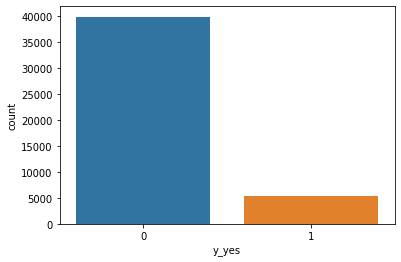

In [181]:
## visualize it

y_train['y_yes'].value_counts()
sns.countplot(x='y_yes', data=y_train)

In [138]:
## create dummy values for data with object dtypes
xT1 = xT.select_dtypes(include=['object'])

xT1 = pd.get_dummies(data=xT1, drop_first=True)

xT1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
job_blue-collar                         45211 non-null uint8
job_entrepreneur                        45211 non-null uint8
job_housemaid                           45211 non-null uint8
job_management                          45211 non-null uint8
job_retired                             45211 non-null uint8
job_self-employed                       45211 non-null uint8
job_services                            45211 non-null uint8
job_student                             45211 non-null uint8
job_technician                          45211 non-null uint8
job_unemployed                          45211 non-null uint8
job_unknown                             45211 non-null uint8
marital_married                         45211 non-null uint8
marital_single                          45211 non-null uint8
education_secondary                     45211 non-null uint8
education_tertiary                   

In [139]:
## creater xT2 from integer dtypes columns only

xT2 = xT.select_dtypes(include=['int'])

## join x1 and x2 (integer dtypes only) on index column

x_train= xT1.merge(xT2, left_index=True, right_index=True)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
job_blue-collar                         45211 non-null uint8
job_entrepreneur                        45211 non-null uint8
job_housemaid                           45211 non-null uint8
job_management                          45211 non-null uint8
job_retired                             45211 non-null uint8
job_self-employed                       45211 non-null uint8
job_services                            45211 non-null uint8
job_student                             45211 non-null uint8
job_technician                          45211 non-null uint8
job_unemployed                          45211 non-null uint8
job_unknown                             45211 non-null uint8
marital_married                         45211 non-null uint8
marital_single                          45211 non-null uint8
education_secondary                     45211 non-null uint8
education_tertiary                   

In [141]:
print(x_train)
print(y_train)

       job_blue-collar  job_entrepreneur  ...  pdays  previous
0                    0                 0  ...     -1         0
1                    0                 0  ...     -1         0
2                    0                 1  ...     -1         0
3                    1                 0  ...     -1         0
4                    0                 0  ...     -1         0
...                ...               ...  ...    ...       ...
45206                0                 0  ...     -1         0
45207                0                 0  ...     -1         0
45208                0                 0  ...    184         3
45209                1                 0  ...     -1         0
45210                0                 1  ...    188        11

[45211 rows x 42 columns]
       y_yes
0          0
1          0
2          0
3          0
4          0
...      ...
45206      1
45207      1
45208      1
45209      0
45210      0

[45211 rows x 1 columns]


In [148]:
print(x_test)
print(y_test)

      job_blue-collar  job_entrepreneur  ...  pdays  previous
0                   0                 0  ...     -1         0
1                   0                 0  ...    339         4
2                   0                 0  ...    330         1
3                   0                 0  ...     -1         0
4                   1                 0  ...     -1         0
...               ...               ...  ...    ...       ...
4516                0                 0  ...     -1         0
4517                0                 0  ...     -1         0
4518                0                 0  ...     -1         0
4519                1                 0  ...    211         3
4520                0                 1  ...    249         7

[4521 rows x 42 columns]
      y_yes
0         0
1         0
2         0
3         0
4         0
...     ...
4516      0
4517      0
4518      0
4519      0
4520      0

[4521 rows x 1 columns]


## 1.4 Create Model


In [0]:
## use the sklearn logistic model imported
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

## fit the model with data, change the shape of y to a 1d array instead of a column vector using .ravel()
logreg.fit(x_train,y_train.values.ravel())

## perform prediction on test set
y_testpred=logreg.predict(x_test)

In [162]:
## check model classes, intercept and coefficient

logreg.classes_

array([0, 1], dtype=uint8)

In [163]:
logreg.coef_

array([[-3.43702318e-01, -3.77522941e-01, -5.71230795e-01,
        -1.90618154e-01,  2.45779293e-01, -3.18075268e-01,
        -2.62429215e-01,  3.02439500e-01, -2.13606652e-01,
        -1.97968283e-01, -1.88053187e-01, -2.34566175e-01,
         9.77795295e-03,  9.84949213e-02,  2.90980291e-01,
         1.67483020e-01, -3.08263085e-02, -7.07108906e-01,
        -4.41935855e-01, -1.47489270e-01, -1.59436587e+00,
        -8.32024979e-01,  5.06369491e-01, -2.76712331e-01,
        -1.46567245e+00, -9.41903836e-01,  3.09375906e-01,
         1.53415750e+00, -5.07169795e-01, -1.00535712e+00,
         7.23402349e-01,  7.34125395e-01,  1.73595841e-01,
         2.27530638e+00, -2.13872180e-01, -3.38834606e-03,
         1.26865103e-05,  8.92890383e-03,  4.17579699e-03,
        -9.09373314e-02, -5.10990762e-04,  9.81756077e-03]])

In [164]:
logreg.intercept_

array([-1.96396844])

## 1.5 Evaluate the Model using Metrics from sklearn Library


In [169]:
## use confusion matrix to evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_testpred)
cnf_matrix

array([[3901,   99],
       [ 349,  172]])

### 1.5.1 Visualize confusion matrix

Text(0.5, 257.44, 'Predicted label')

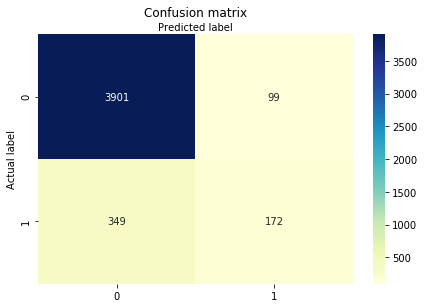

In [172]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### True Positive (TP) = 3901     False Negative(FN) = 99
#### False Positive (FP) = 349     True Negative (TN) = 172


### 1.5.2 Model Evaluation Metrics

##### Accuracy means how often is the classifier correct evaluated as (TP+TN)/total, 1 means best
Precision meaning how ofen would it not label a value that is negative positive, it is evaluated as TP/(TP+FP), 1 means best, 0 means bad

Recall otherwise known as sensitivity, what is the true positive rate evaluated as TP/(TP+FN), 1 means best, 0 means bad

In [173]:
print("Accuracy:",metrics.accuracy_score(y_test, y_testpred))
print("Precision:",metrics.precision_score(y_test, y_testpred))
print("Recall:",metrics.recall_score(y_test, y_testpred))

Accuracy: 0.9009068790090687
Precision: 0.6346863468634686
Recall: 0.33013435700575816


### 1.5.3  ROC Curve


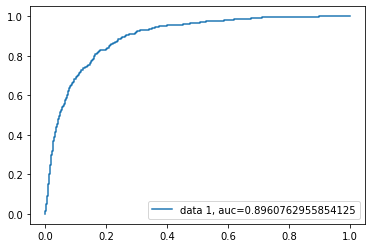

In [174]:
## plot true positive rate vs false positive rate
y_testpred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_testpred_proba)
auc = metrics.roc_auc_score(y_test, y_testpred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### AUC score is 0.896
##### AUC score of 1 typical means perfect, 0.5 means classifier cannot be used. 